In [4]:
from Pipeline import BLEPipeline, WifiPipeline

# General data processing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# ML libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score

# System libraries
from itertools import izip, combinations
import random, time

# Warning filtering
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# Create dataset

In [5]:
time_start = time.time()

In [6]:
w = WifiPipeline()

In [7]:
# w.extract_packet_features(create_master=True)

In [8]:
df = w.make_dataframe()

Router     101880
Mini        75782
Dropcam     45912
Kasa        17156
Netcam2      3056
Netcam3      2961
Netcam1      2314
Switch2      2204
Switch1      1963
Switch3      1955
Insight      1738
Switch4      1504
Lifx2         545
Lifx1         495
TpPlug        366
TpBulb        191
Name: Name, dtype: int64


## Resample

### Downsampling

In [9]:
# Take out packets from router
df = df[df["DeviceType"]!="router"]

df_train = df[df['Set']=='train']

# List variables that do not work with resampling methods
dataframe_vars = {'Name', 'SourceAddr', 'Set', 'SubtypeNum'}
onehotEncoded_vars = {'Belkin', 'Data', 'Dropcam', 
                      'Lifi', 'Netgear', 'QoS_Data', 'QoS_Null', 'Tp-link'}
response_vars = {"DeviceType","bulb","camera","router","plug"}

# Prep X, y
y = df_train["DeviceType"]
col_drop = response_vars | dataframe_vars | set(['Subtype', 'Vendor'])
X = df_train.drop(col_drop, axis=1)

In [10]:
df_train['DeviceType'].value_counts()

plug      83642
camera    51282
bulb        686
Name: DeviceType, dtype: int64

### Create trial dataframes

In [11]:
df_trials = []

for i in range(0,10):
    df_downsampled = w.downsample(X, y, df[df["Set"]=="test"])
    df_trials.append(df_downsampled)

In [12]:
# Wifi: Define which features to use
features_list = [
        # Packet info
        "PacketLength", "Time",
        
        # Vendor 
         "Belkin", "Dropcam", "Lifi", "Netgear", "Tp-link",
    
        # 802.11 Data subtype
        "Data", "QoS_Data", "QoS_Null",

        # Associated Packets
        "Assoc_Packets"]

# Define what the response classes are
y_list = ["camera", "bulb", "plug"]

# Run trials

In [13]:
df_results = []
for i, trial in enumerate(df_trials):
    print "Trial", i
    result = w.one_vs_all_classify(trial, features_list, y_list)
    df_results.append(result)

Trial 0
Device Type: camera
RF


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  18193    232  2183  1924  0.182274   0.892393  0.095641  0.172765
rest      232  18193  1924  2183  0.182274   0.107136  0.903934  0.191567
---------------------------------------------------------
KNN


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  11653    816  1599  8464  0.446609   0.912069  0.420739  0.575841
rest      816  11653  8464  1599  0.446609   0.120661  0.662112  0.204123
---------------------------------------------------------
LDA


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  19033     80  2335  1084   0.15174   0.931271  0.053885  0.101875
rest       80  19033  1084  2335   0.15174   0.109276  0.966874  0.196359
---------------------------------------------------------
Total time (classifiers): 0.327809095383

Device Type: bulb
RF


Metrics
      FN  FP     T

Device Type: camera
RF


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  18493    274  2141  1624  0.167096   0.855638  0.080728  0.147536
rest      274  18493  1624  2141  0.167096   0.103761  0.886542  0.185778
---------------------------------------------------------
KNN


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  11832    754  1661  8285  0.441417   0.916584  0.411841  0.568322
rest      754  11832  8285  1661  0.441417   0.123101  0.687785  0.208826
---------------------------------------------------------
LDA


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  19033     80  2335  1084   0.15174   0.931271  0.053885  0.101875
rest       80  19033  1084  2335   0.15174   0.109276  0.966874  0.196359
---------------------------------------------------------
Total time (classifiers): 0.35057592392

Device Type: bulb
RF


Metrics
        FN    FP     TN    

Device Type: camera
RF


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  18319    335  2080  1798  0.172111   0.842944  0.089377  0.161618
rest      335  18319  1798  2080  0.172111   0.101966  0.861284  0.182344
---------------------------------------------------------
KNN


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  11243    839  1576  8874  0.463785   0.913621  0.441119  0.594972
rest      839  11243  8874  1576  0.463785   0.122943  0.652588  0.206906
---------------------------------------------------------
LDA


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  18983     99  2316  1134  0.153116   0.919708  0.056370  0.106230
rest       99  18983  1134  2316  0.153116   0.108737  0.959006  0.195328
---------------------------------------------------------
Total time (classifiers): 0.289355993271

Device Type: bulb
RF


Metrics
      FN  FP     TN     TP

Device Type: camera
RF


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  18143    277  2138  1974  0.182496   0.876944  0.098126  0.176502
rest      277  18143  1974  2138  0.182496   0.105419  0.885300  0.188403
---------------------------------------------------------
KNN


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  12075    777  1638  8042  0.429611   0.911895  0.399761  0.555847
rest      777  12075  8042  1638  0.429611   0.119449  0.678261  0.203125
---------------------------------------------------------
LDA


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  19016     80  2335  1101  0.152494   0.932261  0.054730  0.103390
rest       80  19016  1101  2335  0.152494   0.109363  0.966874  0.196499
---------------------------------------------------------
Total time (classifiers): 0.298717021942

Device Type: bulb
RF


Metrics
       FN   FP     TN     

## Reports/Plots

In [14]:
device_types = ['bulb', 'camera', 'plug']
classifiers = ['KNN', 'LDA', 'RF']

### AUC

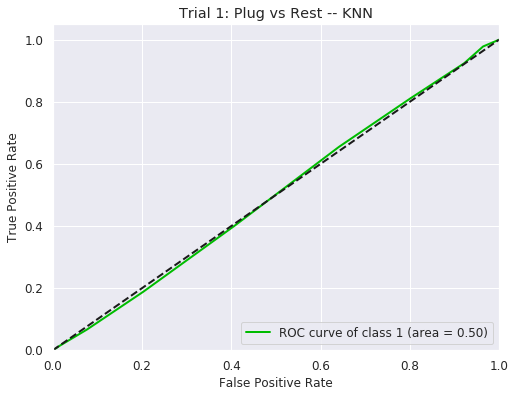

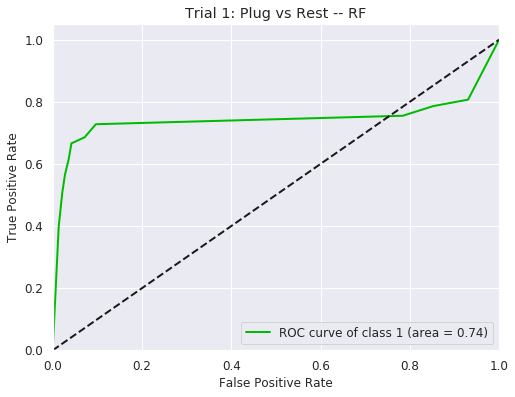

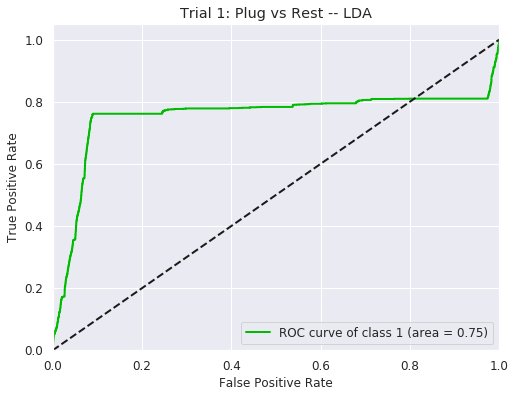

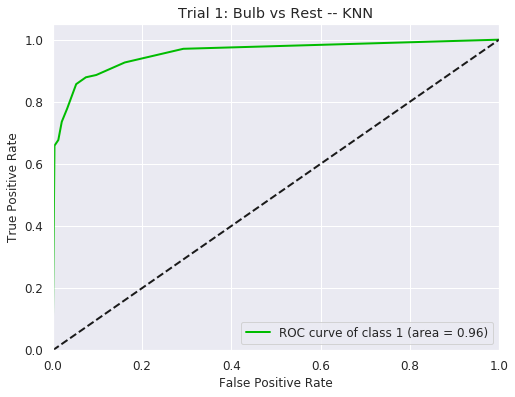

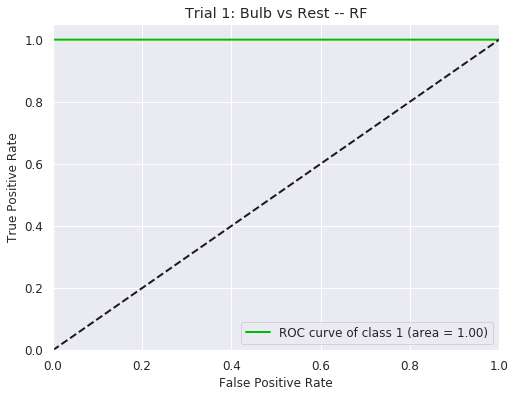

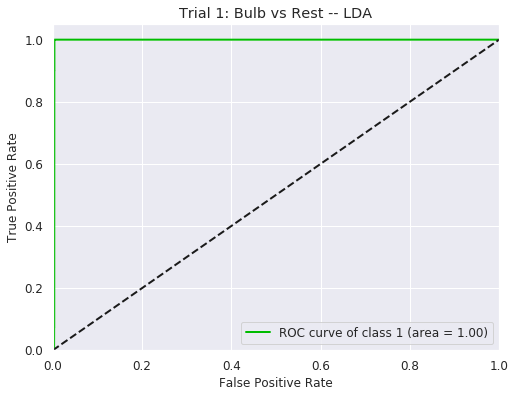

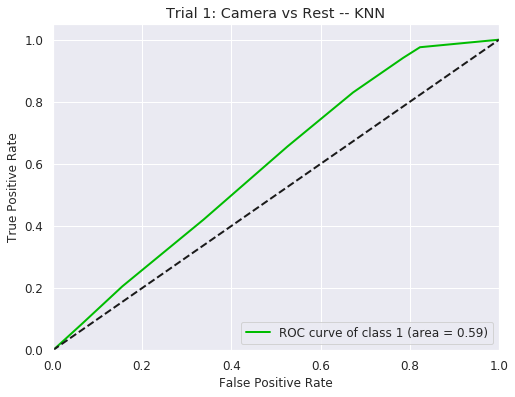

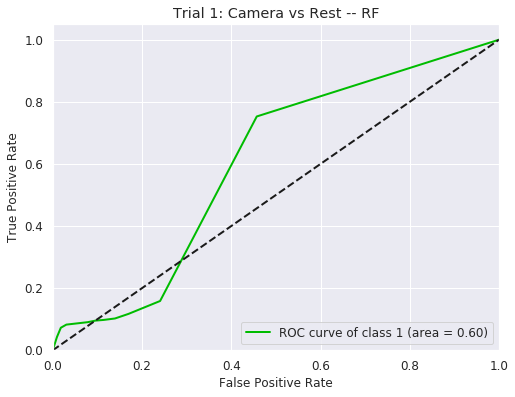

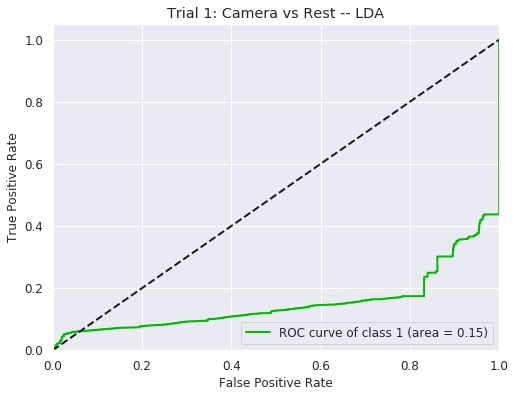

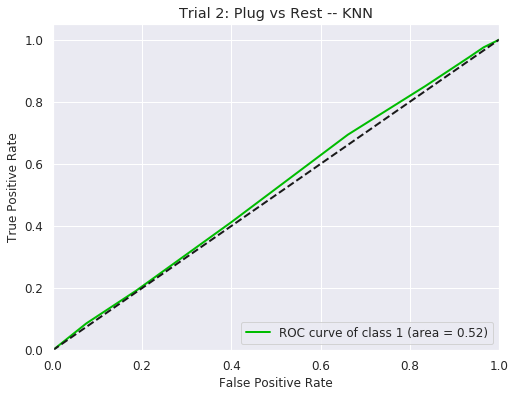

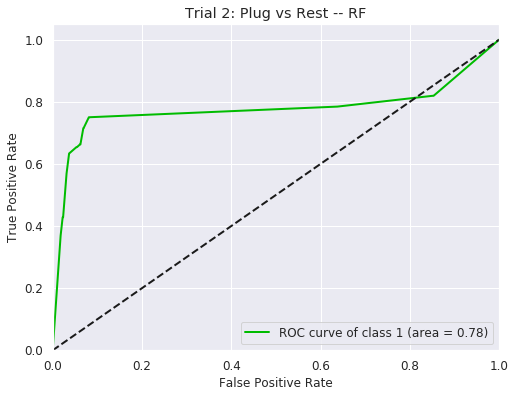

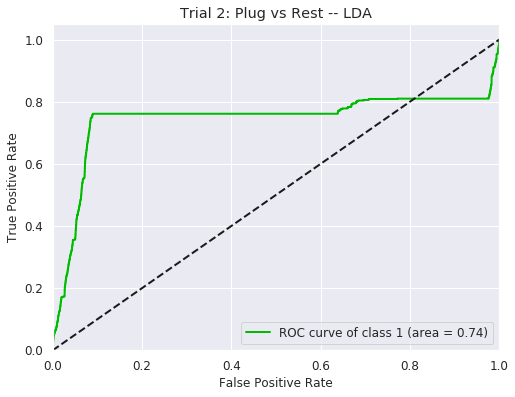

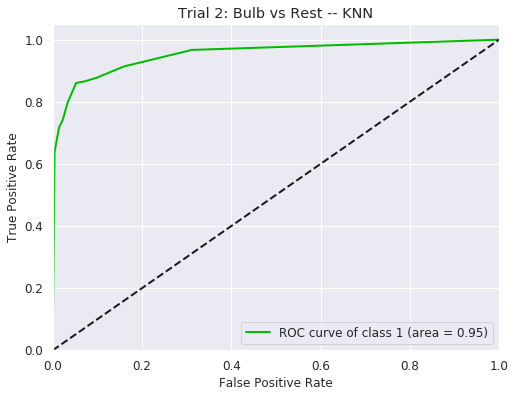

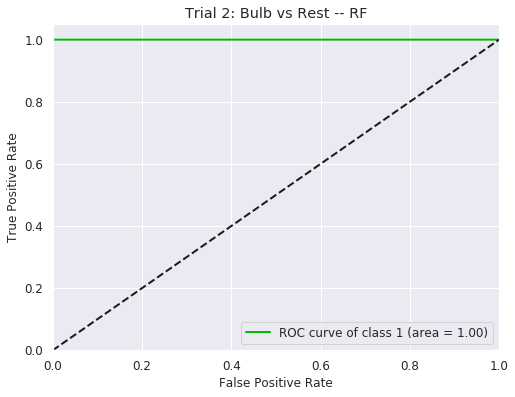

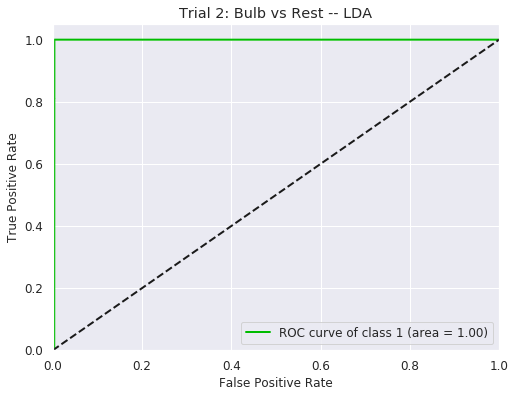

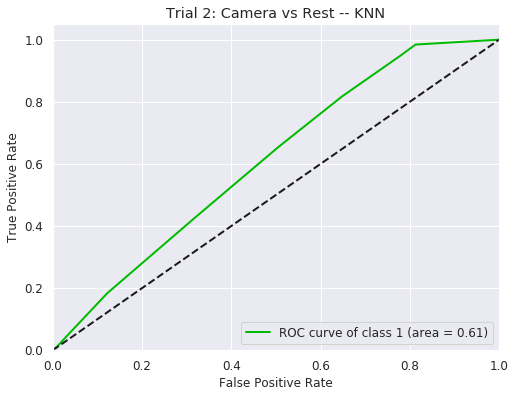

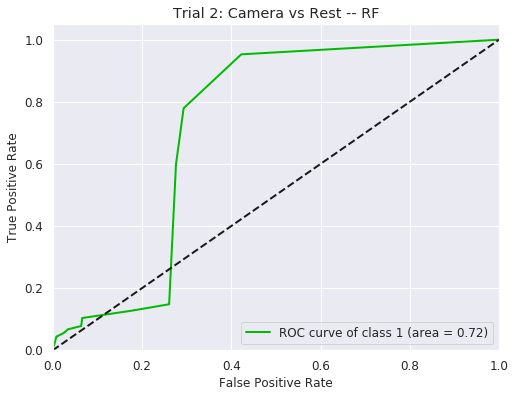

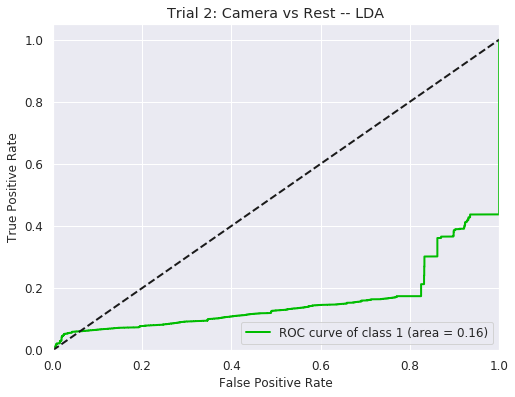

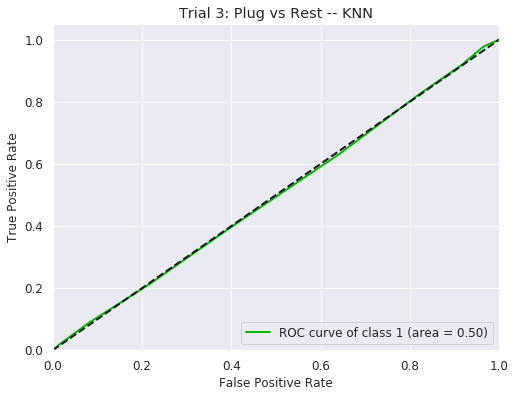

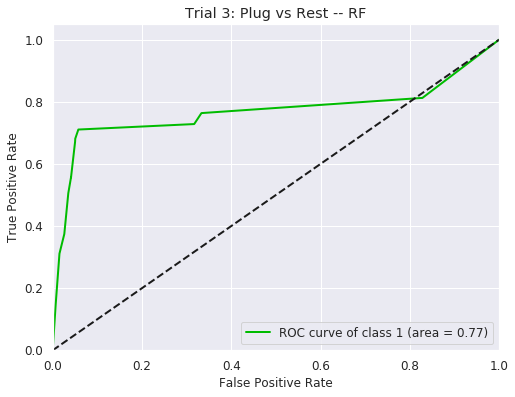

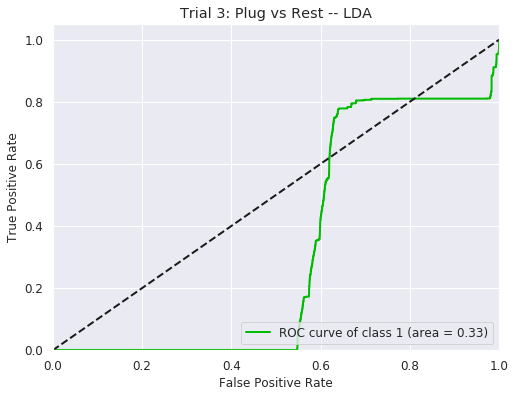

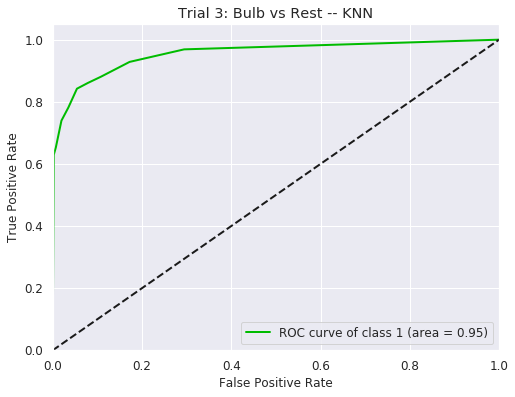

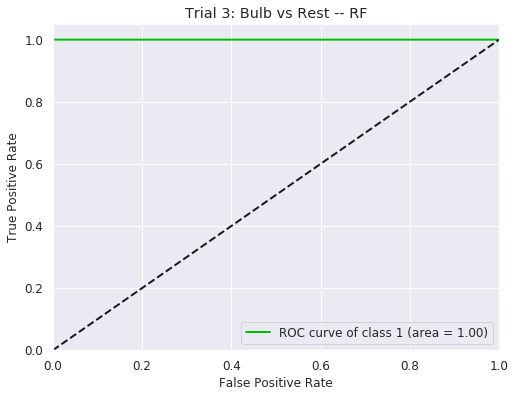

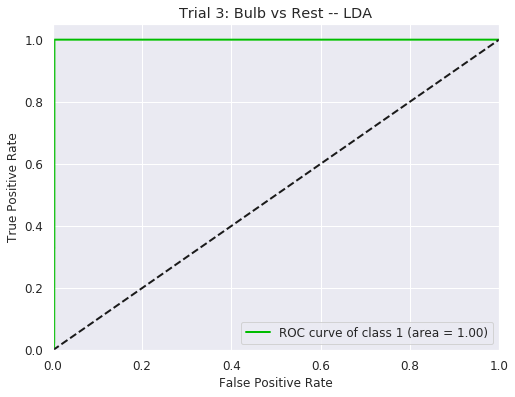

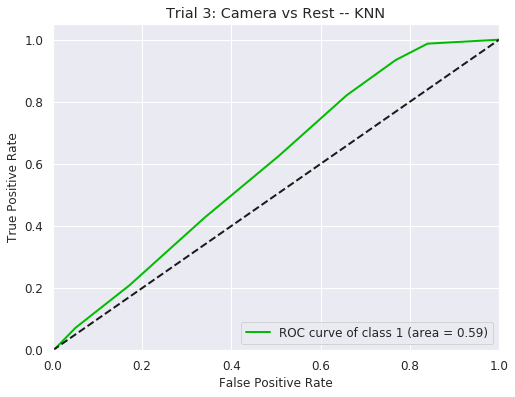

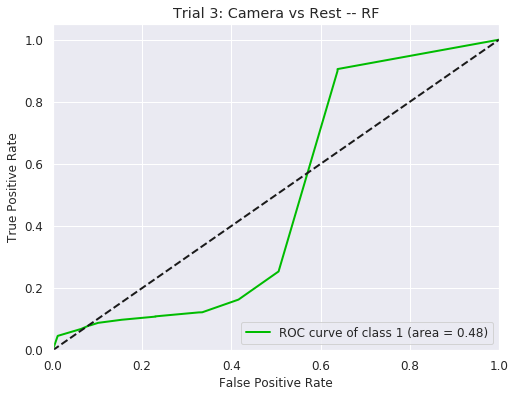

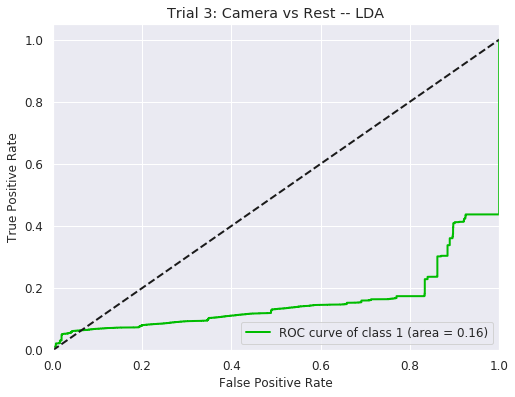

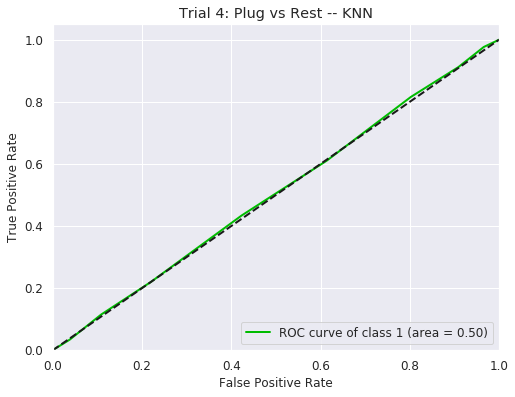

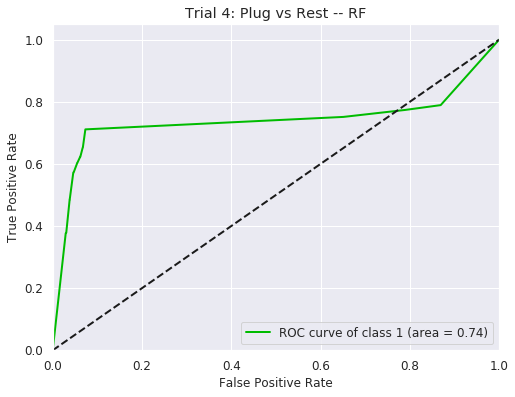

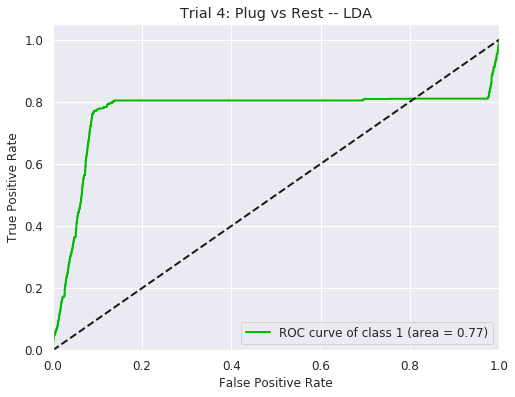

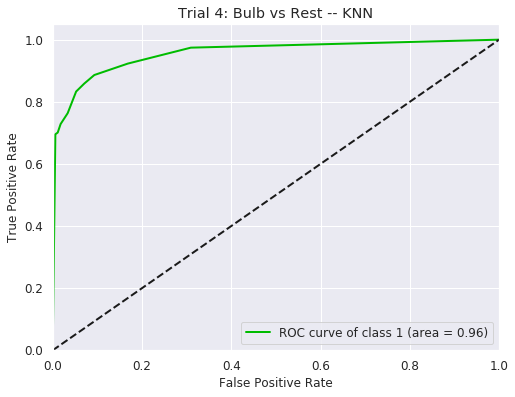

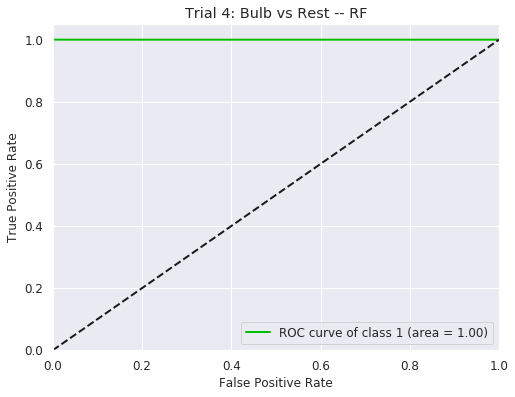

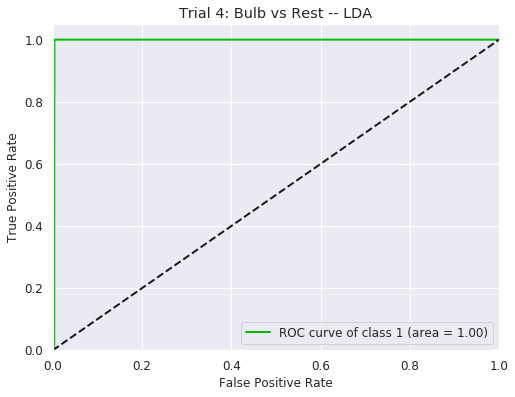

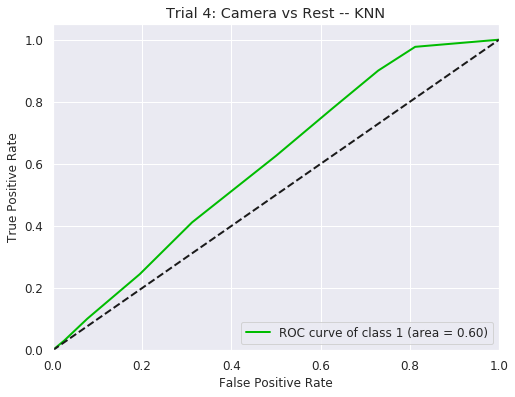

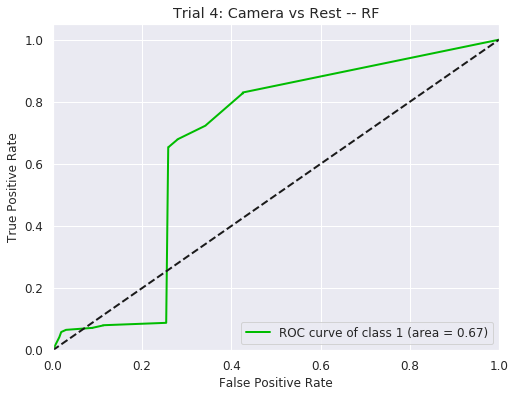

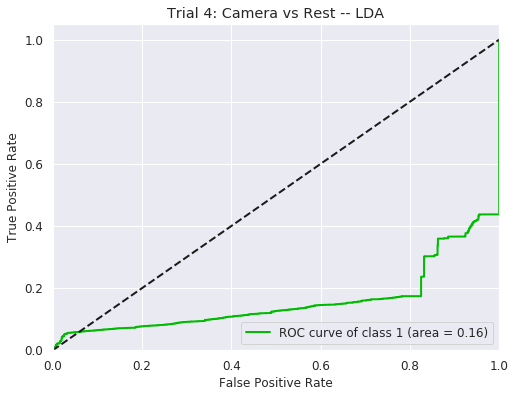

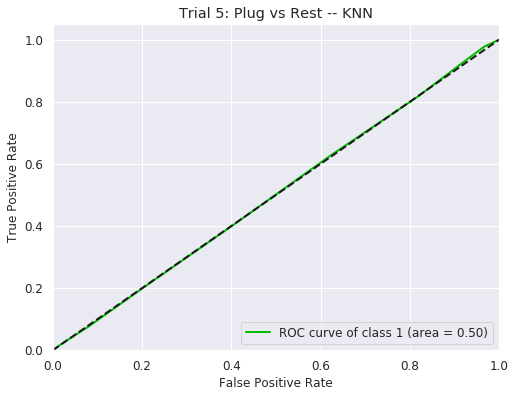

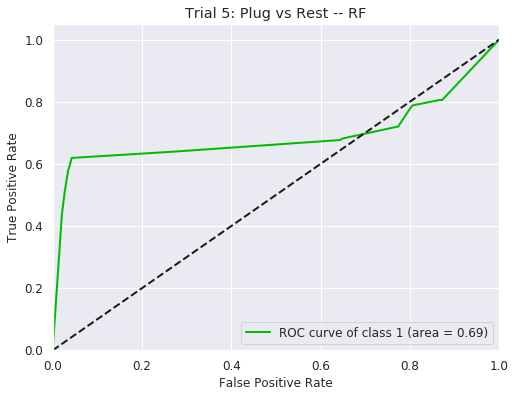

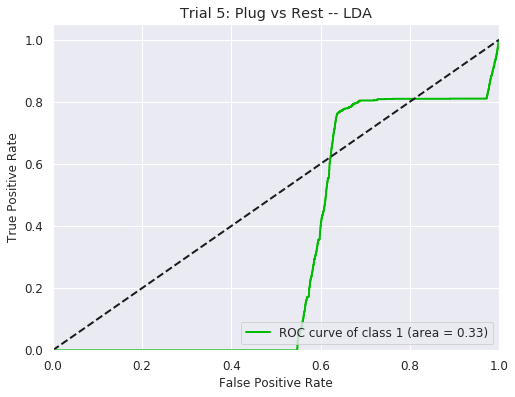

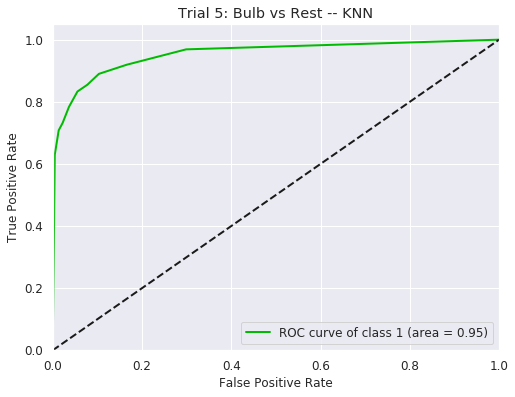

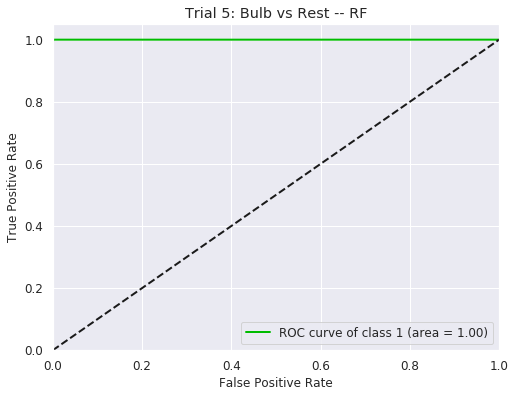

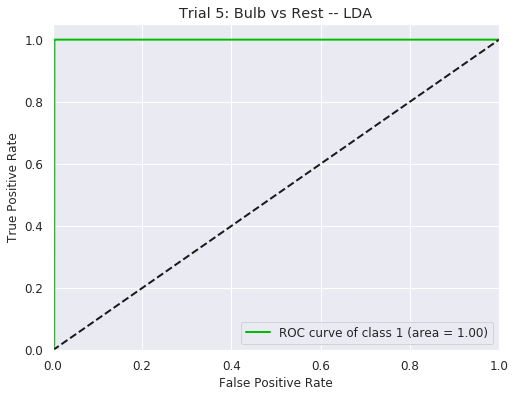

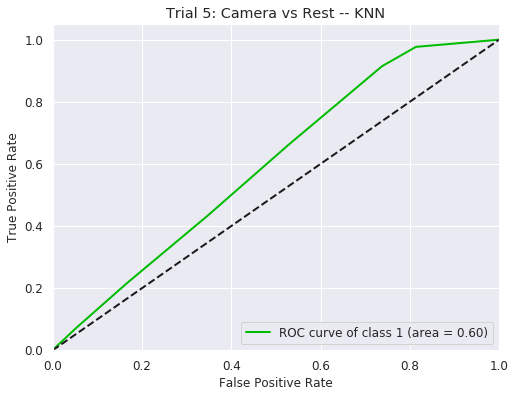

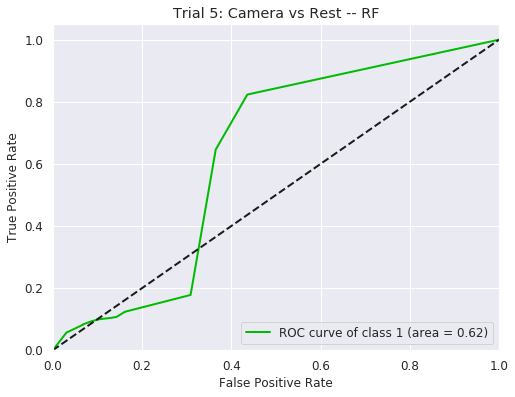

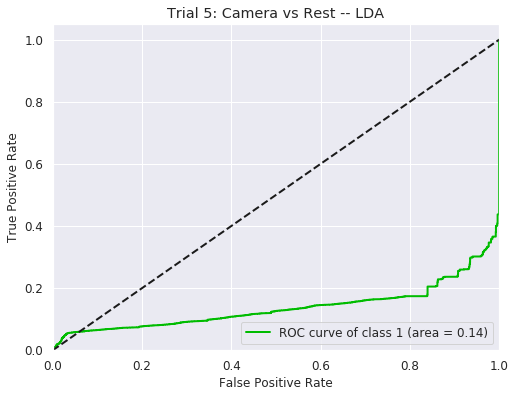

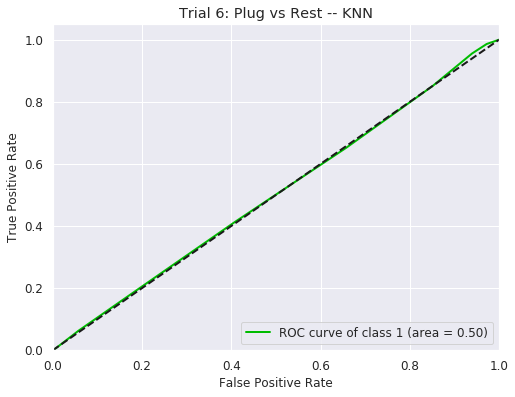

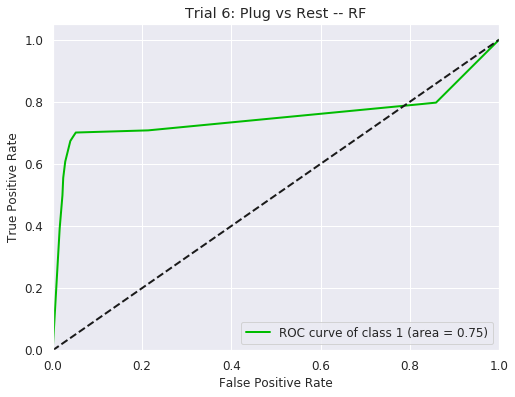

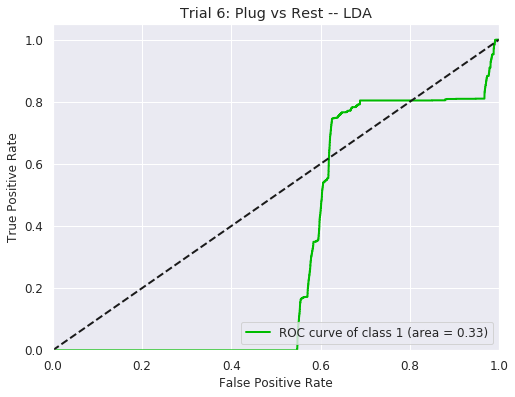

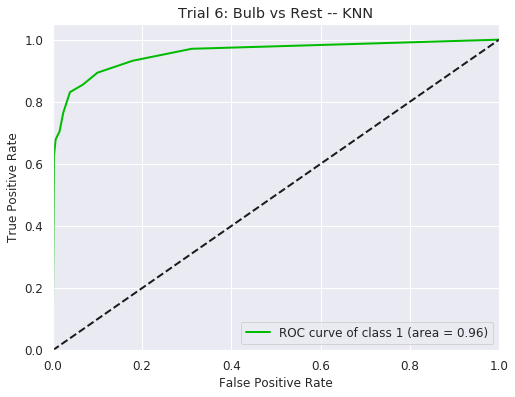

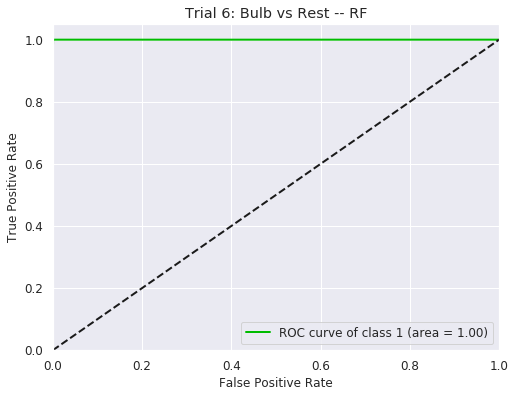

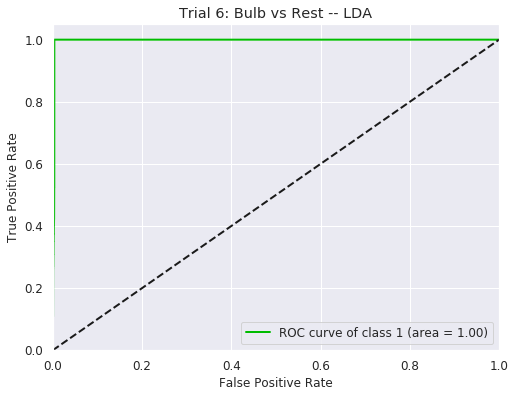

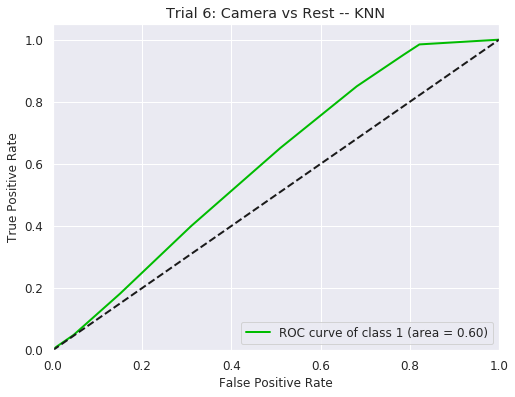

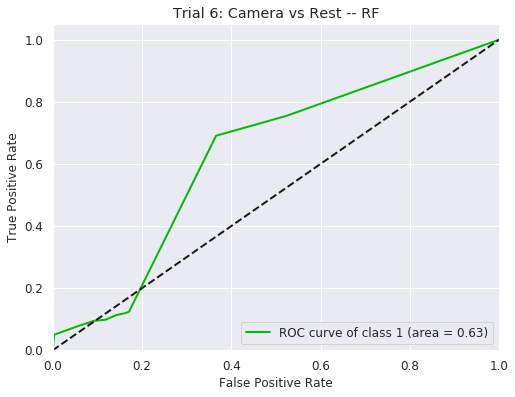

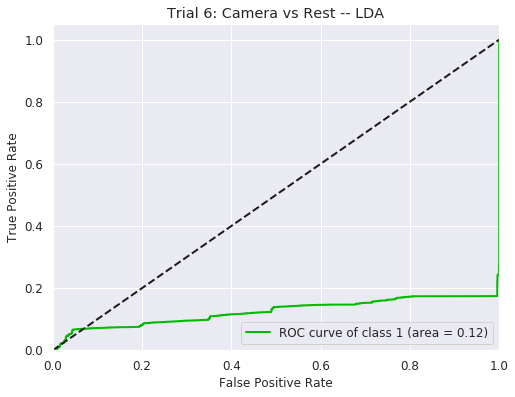

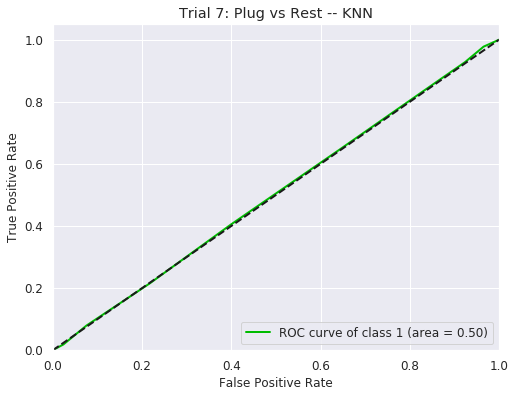

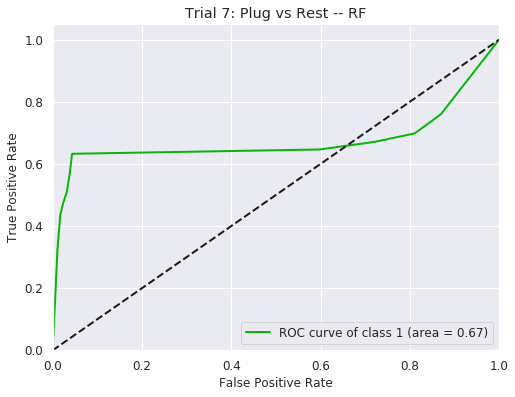

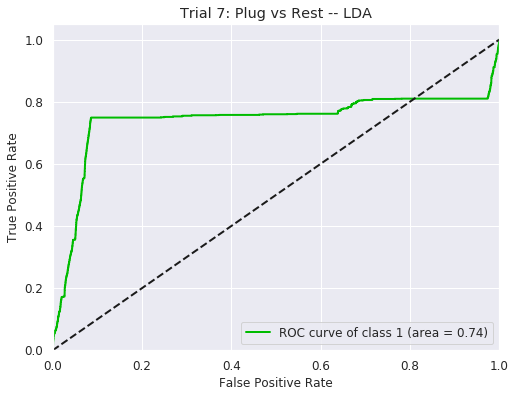

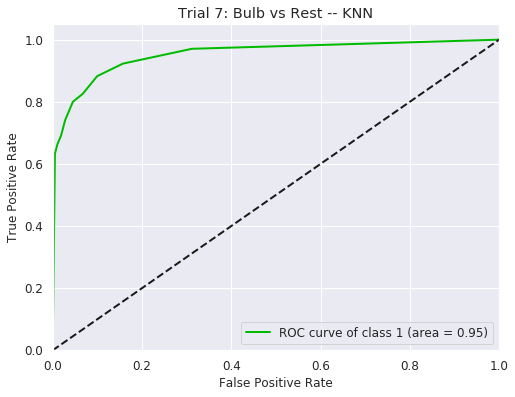

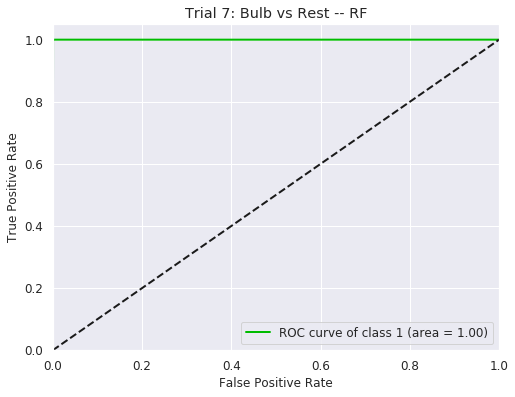

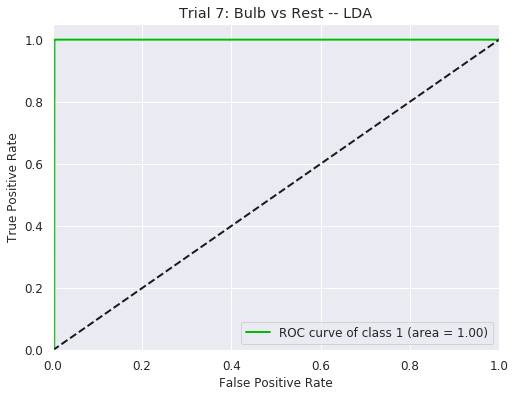

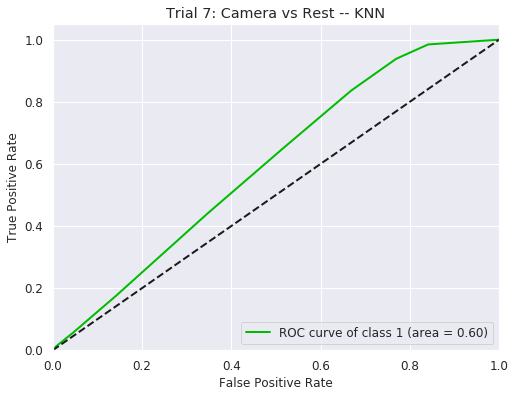

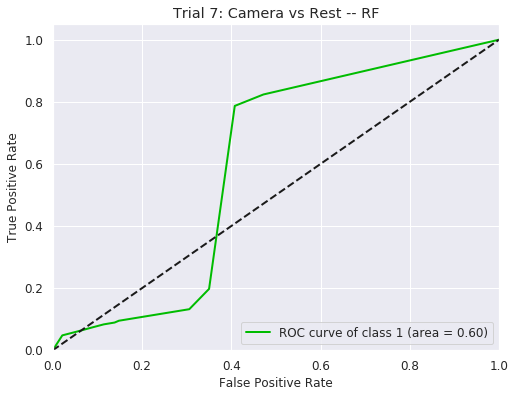

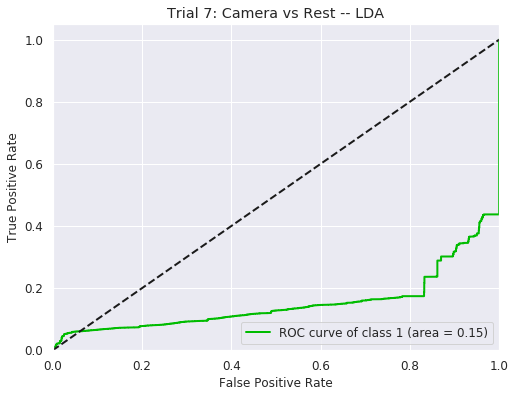

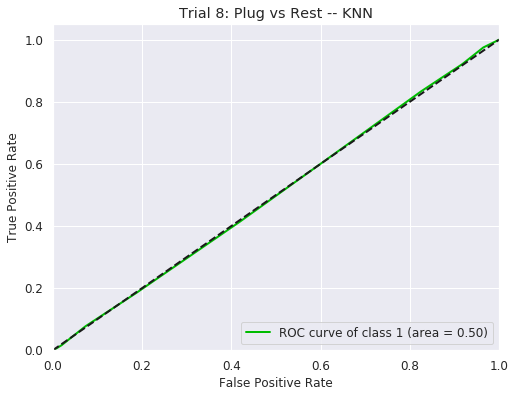

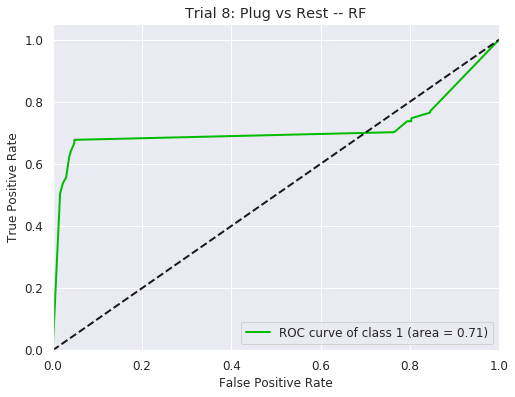

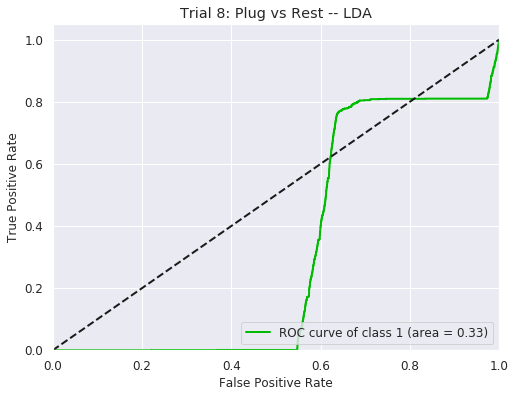

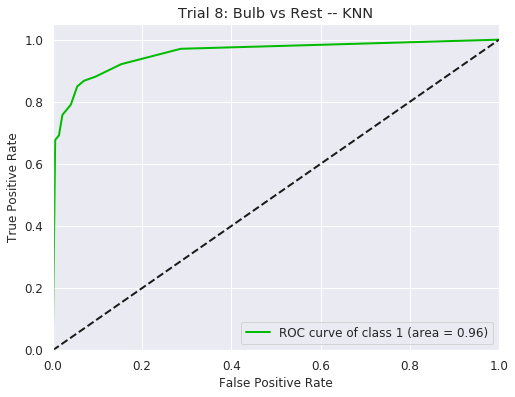

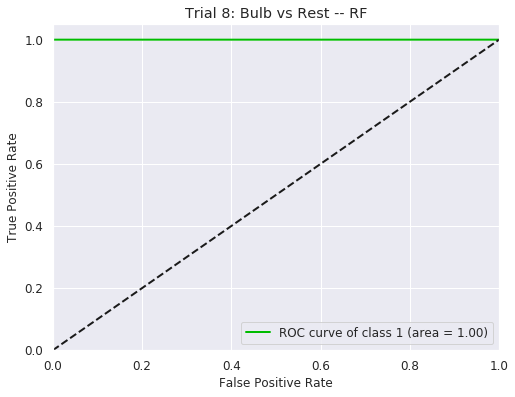

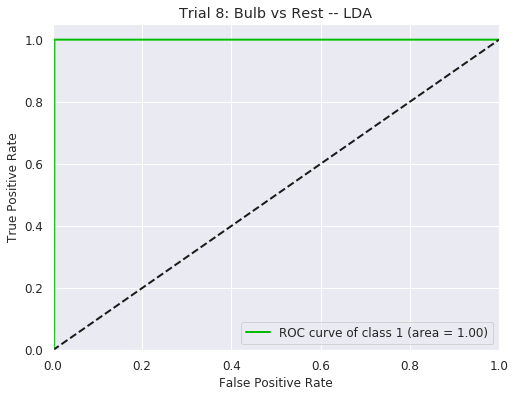

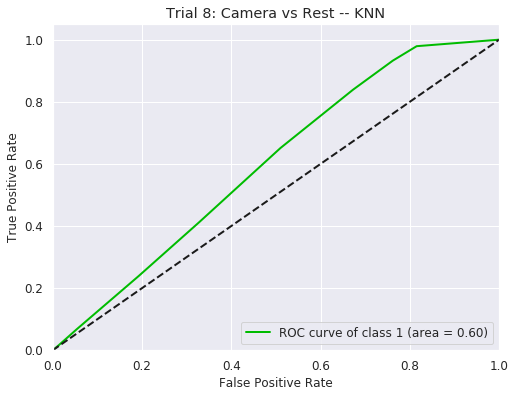

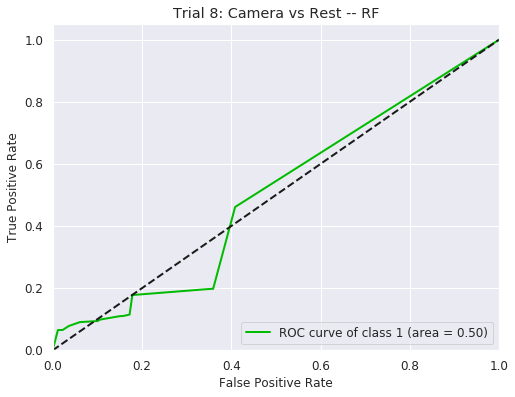

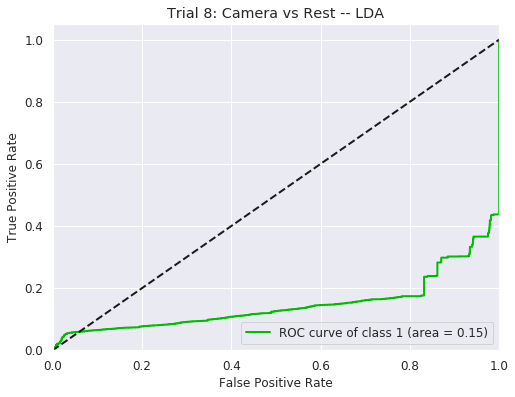

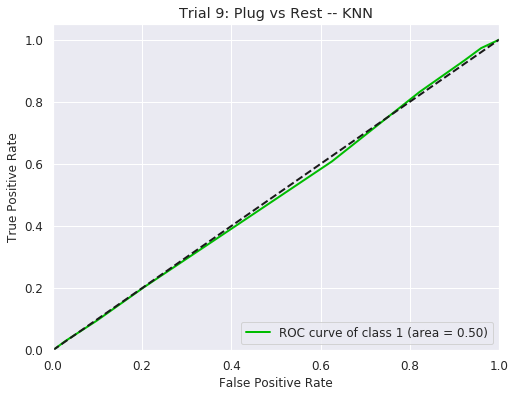

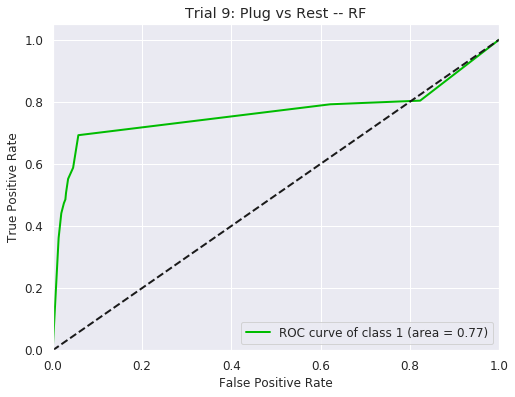

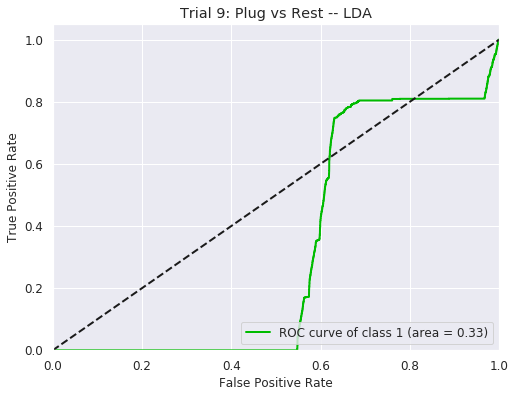

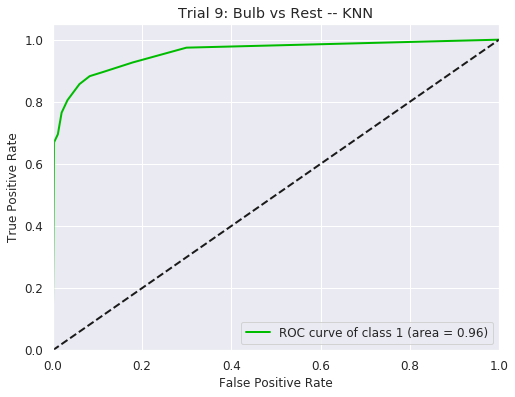

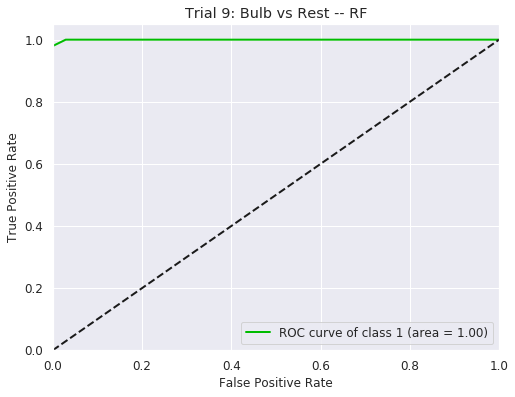

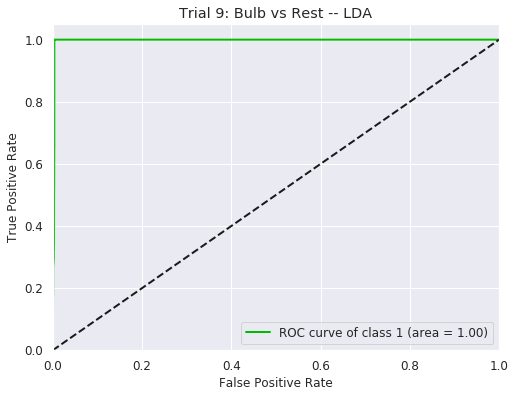

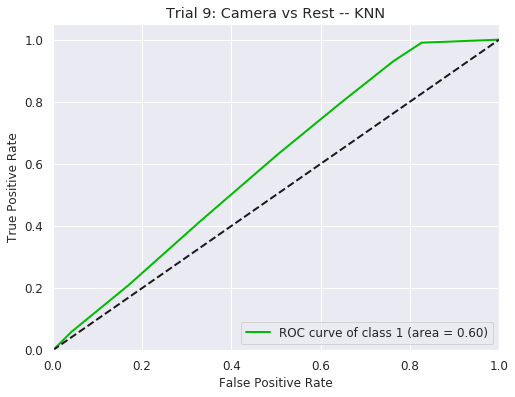

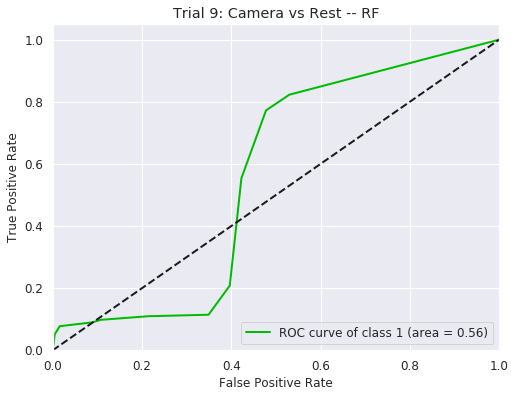

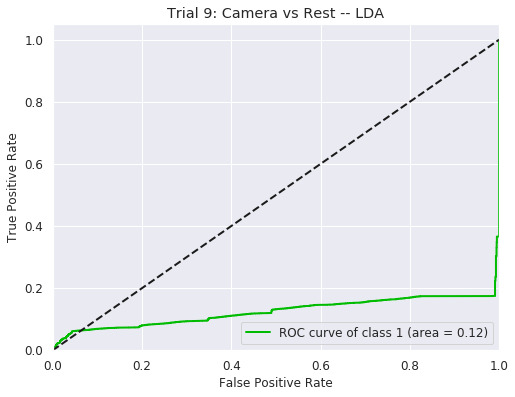

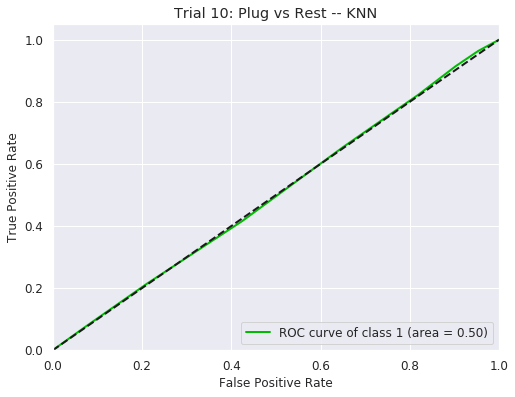

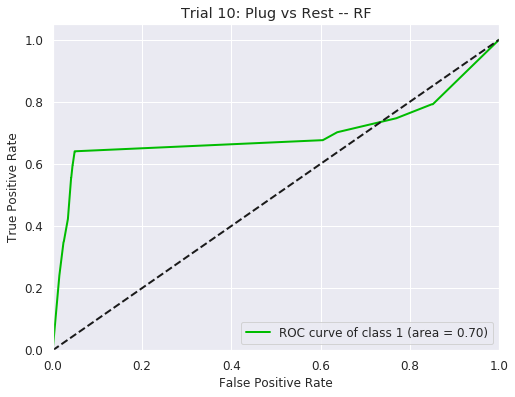

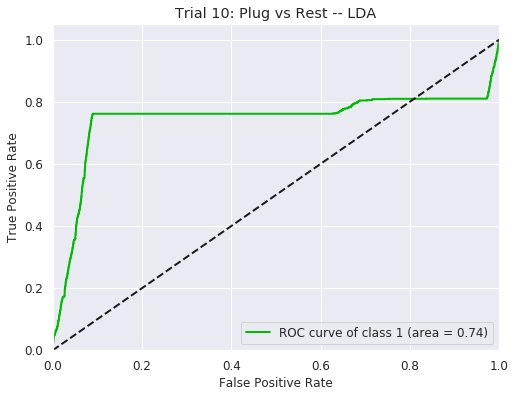

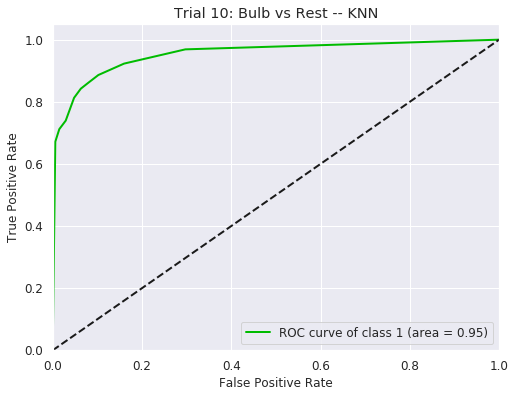

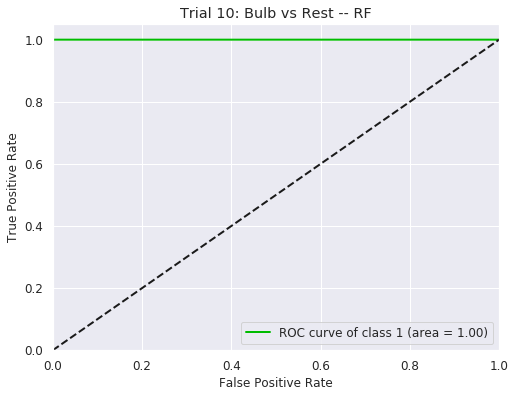

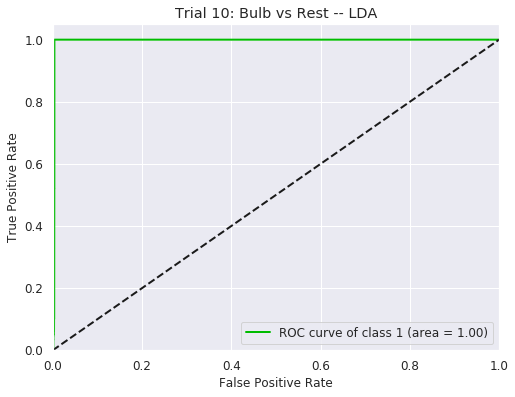

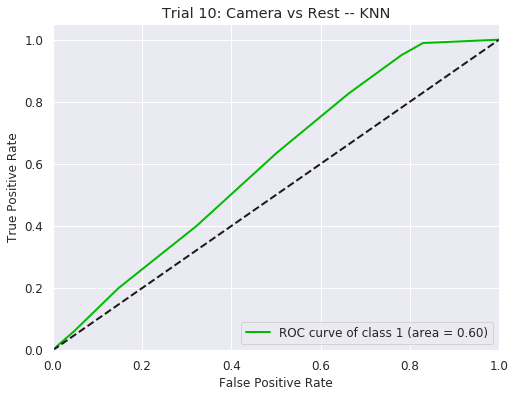

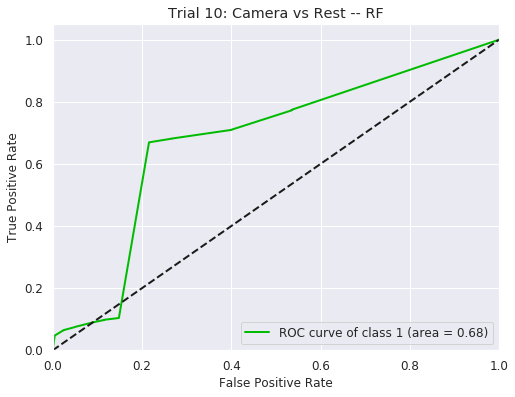

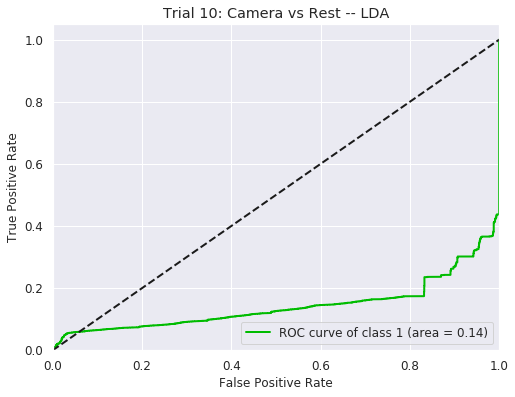

In [15]:
# Plotting ROC curves
sns.set(font_scale=1)

for trial_num, result in enumerate(df_results):
    # Extract devices and classifiers
    dev_pairs = result[0].keys()
    classifiers = result[0][dev_pairs[0]].keys()

    for device in dev_pairs:
        for classifier in classifiers:
            # Extract predicted probas and y_true
            pred_proba = result[0][device][classifier]['Classifier']['Pred_Proba']
            true = result[0][device][classifier]['Classifier']['True']

            # Plot ROC curve
            fpr, tpr, threshold = roc_curve(true, pred_proba[:,1], pos_label=1)
            auc = roc_auc_score(true, pred_proba[:,1])
            title = "Trial " + str(trial_num + 1) + ": " + str(device).capitalize() + " vs Rest -- " + str(classifier).upper() 
            skplt.metrics.plot_roc(true, pred_proba, title=title, plot_micro=False, plot_macro=False, 
                                   classes_to_plot=[1], figsize=(8,6));

### Time Performance

In [16]:
for trial_num, result in enumerate(df_results):
    print "Trial ", trial_num
    print "Total time:", result[1], "seconds"
    
    for device in device_types:
        for classifier in classifiers:
            title = "("+ str(device).capitalize() + ", "+str(classifier).upper() + ")"
            print title, ":", result[0][device][classifier]['Classifier']['Time'], "seconds"
    
    print ""

Trial  0
Total time: 1.47865819931 seconds
(Bulb, KNN) : 0.225003957748 seconds
(Bulb, RF) : 0.053955078125 seconds
(Bulb, LDA) : 0.00715398788452 seconds
(Camera, KNN) : 0.229136943817 seconds
(Camera, RF) : 0.0674810409546 seconds
(Camera, LDA) : 0.0300838947296 seconds
(Plug, KNN) : 0.234887123108 seconds
(Plug, RF) : 0.0607209205627 seconds
(Plug, LDA) : 0.00700807571411 seconds

Trial  1
Total time: 1.45638990402 seconds
(Bulb, KNN) : 0.222850084305 seconds
(Bulb, RF) : 0.0559649467468 seconds
(Bulb, LDA) : 0.00698614120483 seconds
(Camera, KNN) : 0.234101057053 seconds
(Camera, RF) : 0.0718510150909 seconds
(Camera, LDA) : 0.00702500343323 seconds
(Plug, KNN) : 0.224941968918 seconds
(Plug, RF) : 0.0596098899841 seconds
(Plug, LDA) : 0.00700902938843 seconds

Trial  2
Total time: 1.64869189262 seconds
(Bulb, KNN) : 0.22749710083 seconds
(Bulb, RF) : 0.0545539855957 seconds
(Bulb, LDA) : 0.00699400901794 seconds
(Camera, KNN) : 0.253488063812 seconds
(Camera, RF) : 0.0719361305237

### Feature Importance

In [87]:
df_featImp = pd.DataFrame()
for i,f in enumerate(w.feature_importances):
    f_i = pd.Series(f, index=features_list)
    df_featImp[i] = f_i

In [120]:
import numpy as np, scipy.stats as st
a = df_featImp.iloc[:,0:30].T
lower, upper = st.t.interval(0.90, len(a)-1, loc=np.mean(a), scale=st.sem(a))

In [121]:
df_featImp['Mean'] = df_featImp.mean(axis=1)
df_featImp['StdDev'] = df_featImp.std(axis=1)
df_featImp['CI_Lower'] = lower
df_featImp['CI_Upper'] = upper

In [122]:
display(df_featImp[['Mean', 'StdDev', 'CI_Lower', 'CI_Upper']].sort_values('Mean', ascending=False))

,Mean,StdDev,CI_Lower,CI_Upper
PacketLength,0.221511,0.146140,0.175866,0.271866
Belkin,0.208032,0.182852,0.148527,0.269110
Dropcam,0.175280,0.197564,0.109435,0.239733
Assoc_Packets,0.125771,0.082310,0.100100,0.154159
QoS_Null,0.112353,0.094253,0.081849,0.143988
Lifi,0.058644,0.073301,0.034024,0.082348
QoS_Data,0.044867,0.046103,0.029622,0.060034
Time,0.027159,0.015814,0.022340,0.032687
Data,0.011623,0.009299,0.008631,0.014760
Tp-link,0.010815,0.022141,0.003188,0.017733


### Sampling Counts

In [56]:
print "Packet Counts Prior to Resampling"
print df["DeviceType"].value_counts()

Packet Counts Prior to Resampling
plug      85512
camera    71399
bulb       1231
Name: DeviceType, dtype: int64


Training Set plug      83642
camera    51282
bulb        686
Name: DeviceType, dtype: int64

Test Set camera    20117
plug       1870
bulb        545
Name: DeviceType, dtype: int64


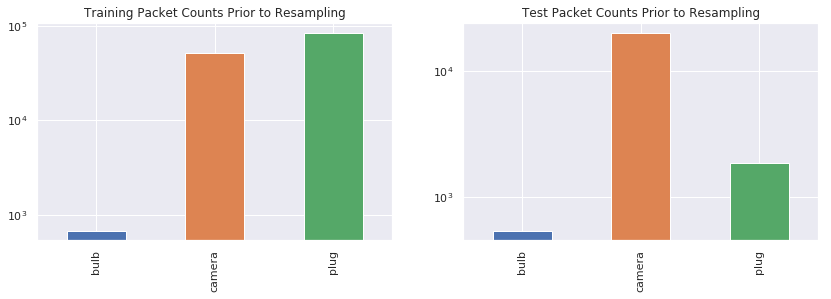

In [19]:
plt.subplots(1, 2, figsize=(14,4)) # number of rows, number of columns, figure size=(width, height)

# Plot training set
df_train = df[df["Set"]=="train"]
plt.subplot(1, 2, 1)
df_train["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Training Packet Counts Prior to Resampling", logy=True);
print "Training Set", df_train["DeviceType"].value_counts()
print

# Plot test set
df_test = df[df["Set"]=="test"]
plt.subplot(1, 2, 2)
df_test["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Test Packet Counts Prior to Resampling", logy=True);
print "Test Set", df_test["DeviceType"].value_counts()

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


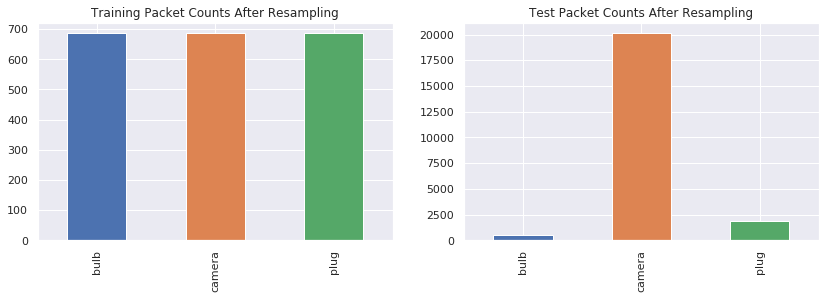

In [20]:
# Plot post-sampling
plt.subplots(1, 2, figsize=(14,4)) # number of rows, number of columns, figure size=(width, height)

df_train_downsampled = df_trials[0][df_trials[0]['Set']=='train']
df_test_downsampled = df_trials[0][df_trials[0]['Set']=='test']

# Plot training set
df_train_downsampled['DeviceType'] = df_train_downsampled[['bulb','camera','plug']].idxmax(1)
plt.subplot(1, 2, 1)
df_train_downsampled['DeviceType'].value_counts().sort_index().plot(kind='bar', title="Training Packet Counts After Resampling");

# Plot test set
df_test = df[df["Set"]=="test"]
plt.subplot(1, 2, 2)
df_test["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Test Packet Counts After Resampling");
